# **Classificação com Árvores de Decisão**

* Aprendizado supervisionado
* Mapeamento de um vetor de atributos para um atributo de classe
* Seja $x_i$ um conjunto de $n$ instâncias pertencentes a uma classe $c$ 
  * $x_i$ tem dimensão $d$
  * existem $m$ classes, $c \in {c_1,...,c_m}$
* Aprendizagem é identificar a função $f$ tal que:
  * $f([x_{i1},x_{i2},...,x_{id}]) = c$

## **Classificação de Câncer de Mama**

* Dataset com atributos de nódulos identificados em imagens digitais de exames de mama. Os dados descrevem características do núcleo celular presentes na imagem e o diagnóstico associado (maligno ou benigno).
* [Breast Cancer Wiscosing Data Set](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)


## **Dicionário de variáveis**

* `Diagnosis:` Diagnóstico se é um tumor maligno (M) ou benigno (B)
* `Radius:` Média da distância do centro até os pontos do contorno
* `Texture:` A textura do núcleo da célula é medida pelo desvio padrão da intensidade da escala de cinza nos pixels componentes
* `Perimeter:` Perímetro do núcleo da célula
* `Area:` Área da superfície do núcleo da célula
* `Smoothness:` A diferença entre o tamanho da linha do raio e a média das linhas ao redor do núcleo do tumor. Ou também a Variação local no comprimento de raio.
* `Compactness:` O perímetro e a área são combinados para dar uma medida *compactness* dos núcleos das células usando a fórmula **perímetro^2 / área.**
* `Concavity:` Mede a magnitude das concavidades do contorno
* `Concave points:` Número de porções côncavas do contorno
* `Symmetry:` Para medir a simetria, o eixo principal, ou corda mais longa através do centro, é encontrado. Em seguida, medimos a diferença de comprimento entre as linhas perpendiculares ao eixo principal até o limite nuclear em ambas as direções.
* `Fractal_dimension:` Traçar o log do perímetro observado contra o log do tamanho da régua e medir a inclinação descendente para encontrar uma aproximação da dimensão fractal.

## 1. Importar bibliotecas necessárias

In [217]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [218]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 2. Lendo dados

In [219]:
dados = pd.read_csv('data.csv')
dados.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 3. Limpeza e organização dos dados

Temos uma coluna inteira com valores nulos, e uma coluna que representa a identificação do paciente. Excluiremos essas colunas.

In [220]:
dados = dados.drop(['Unnamed: 32', 'id'], axis=1)

Trocaremos o tipo do atributo diagnóstico por um tipo numérico

In [221]:
dados['diagnosis'] = dados['diagnosis'].map({'M':1,'B':0})

Temos atributos de três tipos: "mean", "se" e "worst". Utilizaremos, aqui, apenas a "mean", pois essa nos dá a média de cada atributo.

In [222]:
dados = dados.drop(columns=['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])

dados.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


## 4. Análise preliminar dos dados

In [223]:
dados.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


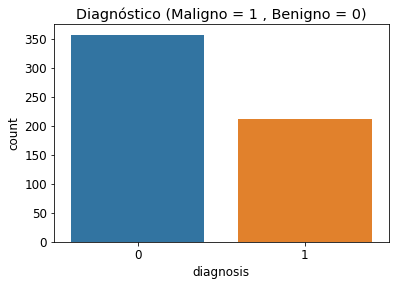

In [224]:
plt.figure(figsize=(6,4))
sns.countplot(x ='diagnosis', data = dados)
plt.title('Diagnóstico (Maligno = 1 , Benigno = 0)')
plt.show()

Vamos dividir o dataframe em dois com base no diagnóstico

In [225]:
features_mean=list(dados.columns[1:11])
dfM=dados[dados['diagnosis'] == 1]
dfB=dados[dados['diagnosis'] == 0]

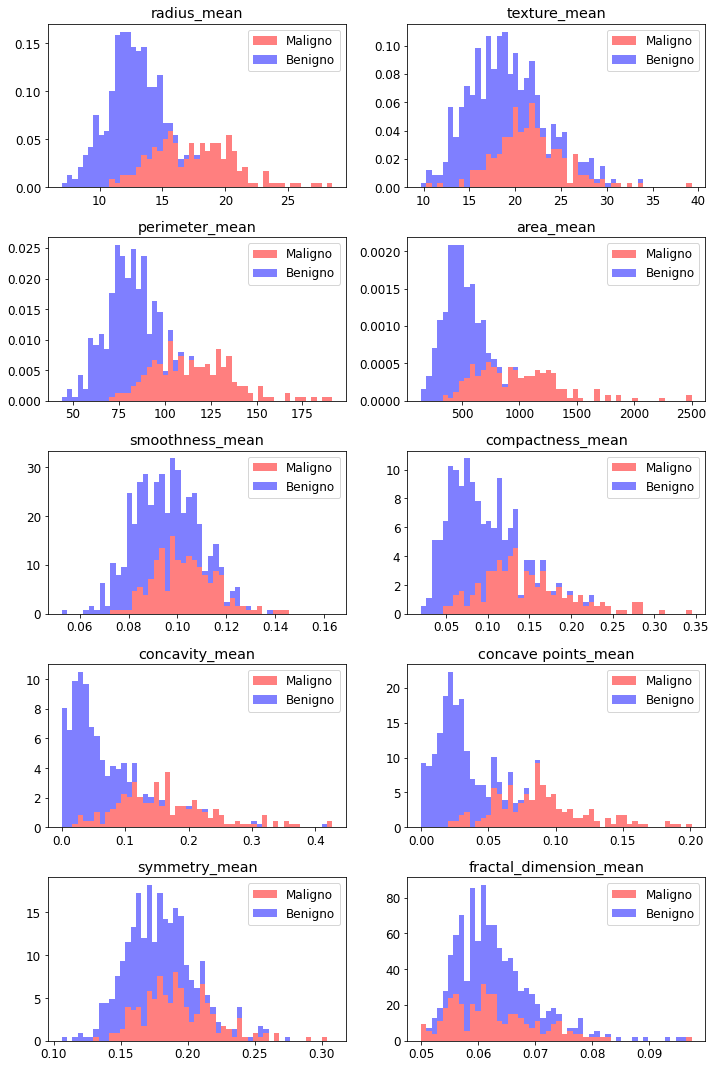

In [226]:
plt.rcParams.update({'font.size': 12})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,15))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(dados[features_mean[idx]]) - min(dados[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(dados[features_mean[idx]]), max(dados[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, density=True, label=['Maligno','Benigno'],color=['r','b'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

## 5. Re-escala dos dados

**Re-escala usando máximo e mínimo**

In [227]:
dados = (dados - dados.min())/(dados.max()-dados.min())

## 6. Organizando dados para modelagem

**Dividindo os dados em atributos descritores e atributo de classe (target)**

In [228]:
X = dados.iloc[:,1:]
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816


In [229]:
y = dados.diagnosis
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: diagnosis, dtype: float64

**Dividindo os dados em treino e teste**

In [230]:
from sklearn.model_selection import train_test_split

* Divide a matriz em subconjuntos aleatórios de treino e teste
* test_size: tamanho do subconjunto de teste (em percentual)
* random_state: define a semente para a aleatoriedade (se não definido, semente aleatória)

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)#random_state=42

## 7. Definindo algoritmo de aprendizado

* Árvore de decisão
* criterion: medida de qualidade das separações ('gini','entropia')
  * gini: impureza de Gini
  * entropy: ganho de informação
* max_depth: profundidade máxima da árvore

In [232]:
from sklearn.tree import DecisionTreeClassifier

In [233]:
#definindo modelo
classificador = DecisionTreeClassifier()

In [234]:
#treinando modelo
classificador.fit(X_train,y_train)

DecisionTreeClassifier()

In [235]:
from sklearn.tree import plot_tree

In [236]:
# mudando o tamanho da figura
plt.rcParams["figure.figsize"] = (30,20)

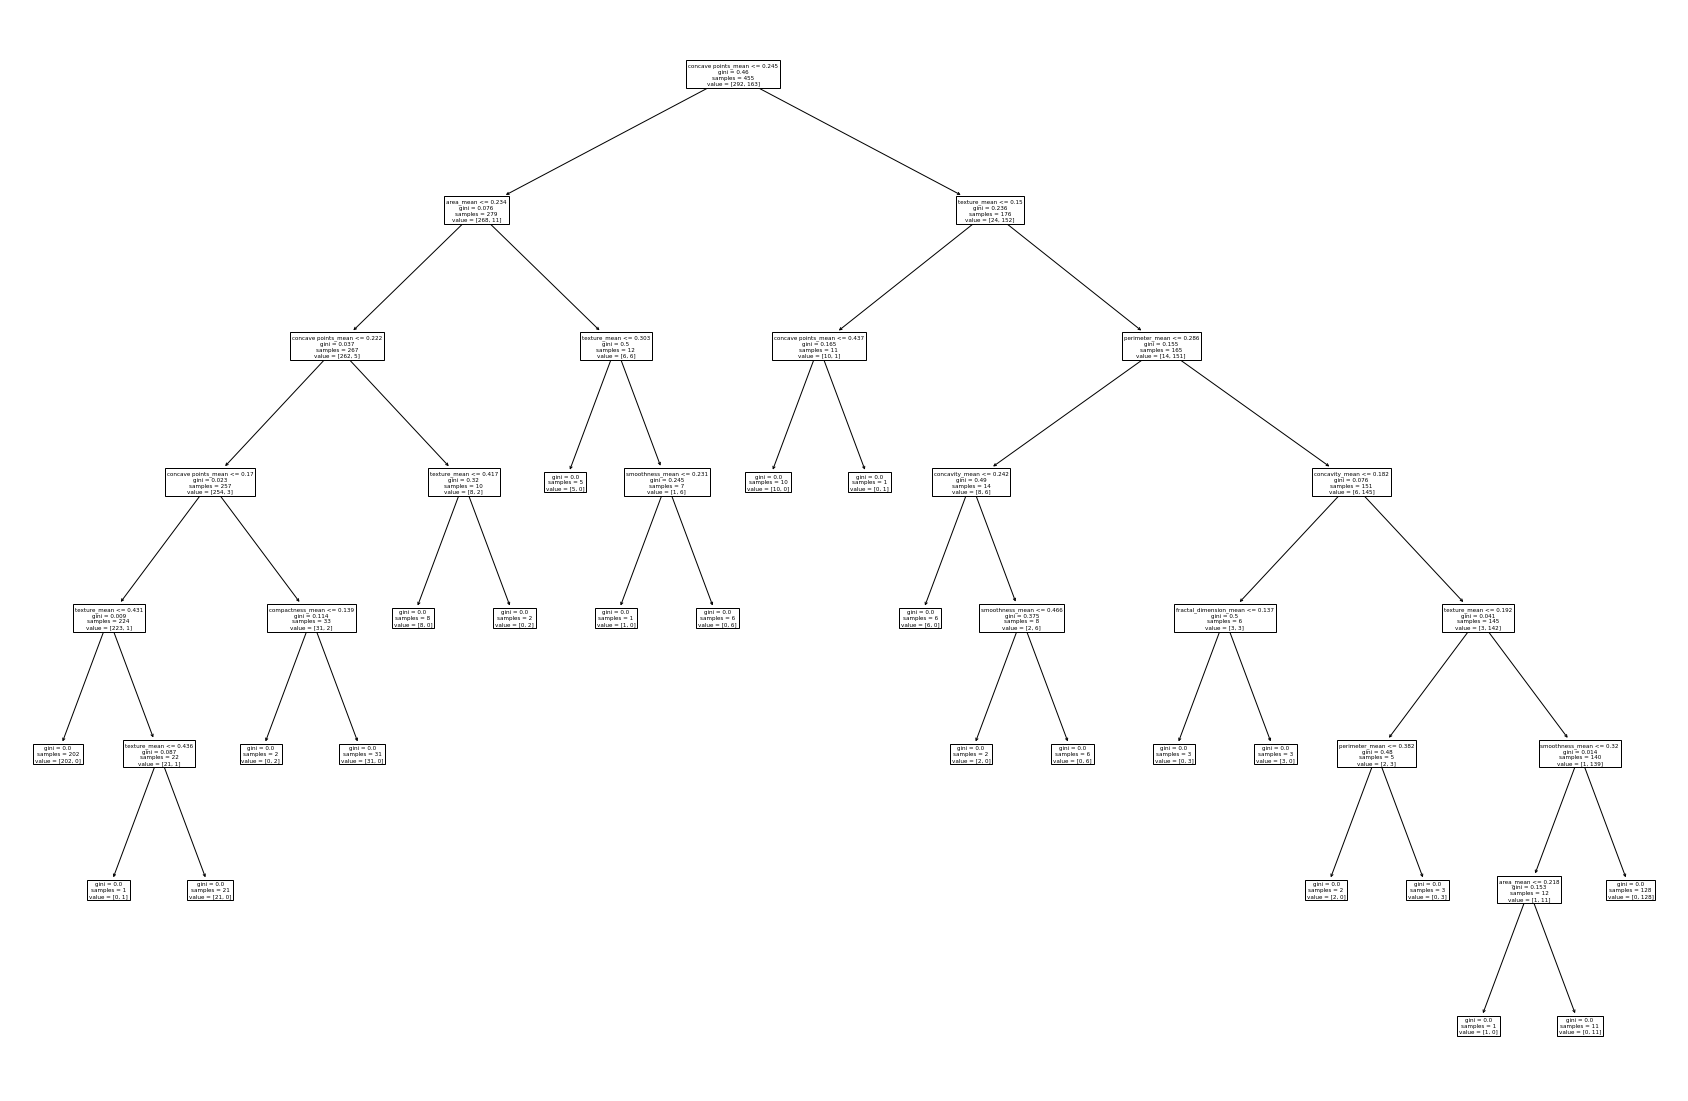

In [237]:
plot_tree(classificador,feature_names=dados.columns[1:])
plt.show()

In [238]:
#realizando classificação
classificacao = classificador.predict(X_test)

## 8. Avaliação do classificador

* Precisamos de métricas para saber quão bem nosso modelo se comportou
* No dataset temos instâncias que são positivas (maligno) e negativas (benigno)
* Ideal é que o classificador classifique como positivo o que é positivo e negativo o que é negativo
* No entanto erros ocorrem na classificação
* Possibilidades de classificação:
  * tp (positivo verdadeiro): nódulo maligno classificado como maligno - acerto
  * tn (negativo verdadeiro): nódulo benigno classificado como benigno - acerto
  * fp (positivo falso): nódulo benigno classificado como maligno - erro
  * fn (negativo falso): nódulo maligno foi classificado como benigno - erro

* Recall
  * taxa de instâncias positivas classificadas corretamente
  * também chamada de sentitividade ($sensitivity$)
  * $recall = \dfrac{tp}{tp+fn} = {3}{3+1} = 0.75$
  * situações onde falsos negativos são mais prejudiciais
    * ex: classificação de doenças

In [239]:
#calculando recall (revocação)
from sklearn.metrics import recall_score

In [240]:
recall = recall_score(y_test,classificacao)
recall

0.8979591836734694

### 8.1 Curva ROC
* Representação gráfica do desempenho de um classificador binário
* Razão entre a taxa de positivos verdadeiros (TPR) e positivos falsos (FPR)
  * $tpr = \dfrac{tp}{tp+fn} = \dfrac{positivos\_verdadeiros}{positivos\_totais}$ 
    * (recall)
  * $fpr = \dfrac{fp}{tn+fp} = \dfrac{positivos\_falsos}{negativos\_totais}$
* Interpretação
  * quanto maior tpr, melhor
  * quanto menor fpr, melhor

In [241]:
#plotando curva roc
from sklearn.metrics  import roc_curve

In [242]:
fpr, tpr, _ = roc_curve(y_test,classificacao)

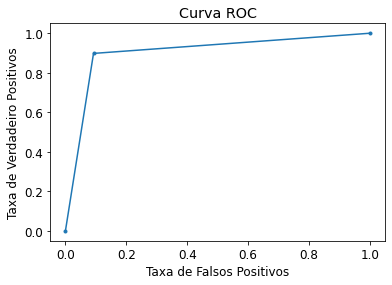

In [243]:
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

### 8.2. Área sob a curva (Area under the curve - AUC)

In [244]:
#calculando area sob a curva ROC
from sklearn.metrics import roc_auc_score

In [245]:
erro = roc_auc_score(y_test,classificacao)
erro

0.9028257456828886

### 8.3. Validação cruzada

* Validação cruzada k-fold
  * dividir o conjunto de dados em  subconjuntos (folds) disjuntos
  * um subconjunto é usado para teste
  * os outros k-1 subconjuntos são usados para criar o modelo
  * repete-se o procedimento k vezes, alternando o subconjunto de teste
  * calcula-se a acurácia média das k repetições e tem-se a avaliação do método

In [246]:
# montando os folds para validação cruzada
from sklearn.model_selection import KFold

In [247]:
kf = KFold(n_splits=5)

In [248]:
# avaliando modelo com cross validation
from sklearn.model_selection import cross_val_score

In [249]:
#define modelo
classificador = DecisionTreeClassifier()

In [250]:
#calculando os scores
scores = cross_val_score(classificador,X,y,cv=10)
scores

array([0.94736842, 0.85964912, 0.92982456, 0.87719298, 0.92982456,
       0.92982456, 0.92982456, 0.92982456, 0.94736842, 0.94642857])

In [251]:
scores.mean(),scores.std()

(0.9227130325814535, 0.02842569970031062)